<a href="https://colab.research.google.com/github/casllmproject/dialectic_intersubjectivity/blob/main/Sentiment_Analysis_code/FINAL(OCT27)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount goolge drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ICR dataset for fox analysis
import pandas as pd

# Load the data files
df_A = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_d.csv') #zeroshot default
df_B = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_ft.csv') #finetune zeroshot
df_C = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_demz.csv') #default dem
df_D = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_repz.csv') #default rep
df_E = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_demft.csv') #ft dem
df_F = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_repft.csv') #ft rep

# Vertically combine the first 50 cases for each sentiment column in each file
df_A_combined = pd.concat([df_A['Biden_Chunk_Responses'].head(50), df_A['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_A')
df_B_combined = pd.concat([df_B['Biden_Chunk_Responses'].head(50), df_B['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_B')
df_C_combined = pd.concat([df_C['Biden_Chunk_Responses'].head(50), df_C['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_C')
df_D_combined = pd.concat([df_D['Biden_Chunk_Responses'].head(50), df_D['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_D')
df_E_combined = pd.concat([df_E['Biden_Chunk_Responses'].head(50), df_E['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_E')
df_F_combined = pd.concat([df_F['Biden_Chunk_Responses'].head(50), df_F['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_F')


In [ ]:
#ICR dataset for MSNBC analysis
# Load the data files
df_A1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_d.csv') #zeroshot default
df_B1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_ft.csv') #finetune zeroshot
df_C1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_demz.csv') #default dem
df_D1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_repz.csv') #default rep
df_E1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_demft.csv') #ft dem
df_F1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_repft.csv') #ft rep

# Vertically combine the two sentiment columns in each file, dropping the original labels
df_A1_combined = pd.concat([df_A1['Biden_Chunk_Responses'].head(50), df_A1['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_A')
df_B1_combined = pd.concat([df_B1['Biden_Chunk_Responses'].head(50), df_B1['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_B')
df_C1_combined = pd.concat([df_C1['Biden_Chunk_Responses'].head(50), df_C1['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_C')
df_D1_combined = pd.concat([df_D1['Biden_Chunk_Responses'].head(50), df_D1['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_D')
df_E1_combined = pd.concat([df_E1['Biden_Chunk_Responses'].head(50), df_E1['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_E')
df_F1_combined = pd.concat([df_F1['Biden_Chunk_Responses'].head(50), df_F1['Trump_Chunk_Responses'].head(50)], ignore_index=True).to_frame(name='combined_sentiment_F')

In [ ]:
#ICR dataset for FOX+MSNBC analysis

# Vertically combine the two sentiment columns in each file, dropping the original labels
df_AF_combined = pd.concat([df_A_combined['combined_sentiment_A'], df_A1_combined['combined_sentiment_A']], ignore_index=True).to_frame(name='combined_sentiment_AF')
df_BF_combined = pd.concat([df_B_combined['combined_sentiment_B'], df_B1_combined['combined_sentiment_B']], ignore_index=True).to_frame(name='combined_sentiment_BF')
df_CF_combined = pd.concat([df_C_combined['combined_sentiment_C'], df_C1_combined['combined_sentiment_C']], ignore_index=True).to_frame(name='combined_sentiment_CF')
df_DF_combined = pd.concat([df_D_combined['combined_sentiment_D'], df_D1_combined['combined_sentiment_D']], ignore_index=True).to_frame(name='combined_sentiment_DF')
df_EF_combined = pd.concat([df_E_combined['combined_sentiment_E'], df_E1_combined['combined_sentiment_E']], ignore_index=True).to_frame(name='combined_sentiment_EF')
df_FF_combined = pd.concat([df_F_combined['combined_sentiment_F'], df_F1_combined['combined_sentiment_F']], ignore_index=True).to_frame(name='combined_sentiment_FF')

In [ ]:
# Concatenate the two combined dataframes into a new dataframe with two columns
df_A_B = pd.concat([df_AF_combined, df_BF_combined], axis=1)
df_A_C = pd.concat([df_AF_combined, df_CF_combined], axis=1)
df_A_D = pd.concat([df_AF_combined, df_DF_combined], axis=1)
df_A_E = pd.concat([df_AF_combined, df_EF_combined], axis=1)
df_A_F = pd.concat([df_AF_combined, df_FF_combined], axis=1)
df_B_C = pd.concat([df_BF_combined, df_CF_combined], axis=1)
df_B_D = pd.concat([df_BF_combined, df_DF_combined], axis=1)
df_B_E = pd.concat([df_BF_combined, df_EF_combined], axis=1)
df_B_F = pd.concat([df_BF_combined, df_FF_combined], axis=1)
df_C_D = pd.concat([df_CF_combined, df_DF_combined], axis=1)
df_C_E = pd.concat([df_CF_combined, df_EF_combined], axis=1)
df_C_F = pd.concat([df_CF_combined, df_FF_combined], axis=1)
df_D_E = pd.concat([df_DF_combined, df_EF_combined], axis=1)
df_D_F = pd.concat([df_DF_combined, df_FF_combined], axis=1)
df_E_F = pd.concat([df_EF_combined, df_FF_combined], axis=1)

# Add 2 to every value in the combined DataFrames
df_A_B += 2
df_A_C += 2
df_A_D += 2
df_A_E += 2
df_A_F += 2
df_B_C += 2
df_B_D += 2
df_B_E += 2
df_B_F += 2
df_C_D += 2
df_C_E += 2
df_C_F += 2
df_D_E += 2
df_D_F += 2
df_E_F += 2

# Save the result to a new CSV file
df_A_B.to_csv('/content/drive/MyDrive/CASLLM/A_B_icr_set.csv', index=False, header=False)
df_A_C.to_csv('/content/drive/MyDrive/CASLLM/A_C_icr_set.csv', index=False, header=False)
df_A_D.to_csv('/content/drive/MyDrive/CASLLM/A_D_icr_set.csv', index=False, header=False)
df_A_E.to_csv('/content/drive/MyDrive/CASLLM/A_E_icr_set.csv', index=False, header=False)
df_A_F.to_csv('/content/drive/MyDrive/CASLLM/A_F_icr_set.csv', index=False, header=False)
df_B_C.to_csv('/content/drive/MyDrive/CASLLM/B_C_icr_set.csv', index=False, header=False)
df_B_D.to_csv('/content/drive/MyDrive/CASLLM/B_D_icr_set.csv', index=False, header=False)
df_B_E.to_csv('/content/drive/MyDrive/CASLLM/B_E_icr_set.csv', index=False, header=False)
df_B_F.to_csv('/content/drive/MyDrive/CASLLM/B_F_icr_set.csv', index=False, header=False)
df_C_D.to_csv('/content/drive/MyDrive/CASLLM/C_D_icr_set.csv', index=False, header=False)
df_C_E.to_csv('/content/drive/MyDrive/CASLLM/C_E_icr_set.csv', index=False, header=False)
df_C_F.to_csv('/content/drive/MyDrive/CASLLM/C_F_icr_set.csv', index=False, header=False)
df_D_E.to_csv('/content/drive/MyDrive/CASLLM/D_E_icr_set.csv', index=False, header=False)
df_D_F.to_csv('/content/drive/MyDrive/CASLLM/D_F_icr_set.csv', index=False, header=False)
df_E_F.to_csv('/content/drive/MyDrive/CASLLM/E_F_icr_set.csv', index=False, header=False)

ANOVA for Mean differences

In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Function to add "Sentiment_Contrast" column for a given file
def add_sentiment_contrast(file_path):
    df = pd.read_csv(file_path)
    df['Sentiment_Contrast'] = df['Biden_Sentiment'] - df['Trump_Sentiment']
    return df

# List of file paths
files = [
    '/content/drive/MyDrive/CASLLM/coded_fox_oct27_averaged_d.csv',
    '/content/drive/MyDrive/CASLLM/coded_fox_oct27_averaged_ft.csv',
    '/content/drive/MyDrive/CASLLM/coded_fox_oct27_averaged_demz.csv',
    '/content/drive/MyDrive/CASLLM/coded_fox_oct27_averaged_repz.csv',
    '/content/drive/MyDrive/CASLLM/coded_fox_oct27_averaged_demft.csv',
    '/content/drive/MyDrive/CASLLM/coded_fox_oct27_averaged_repft.csv'
]

# List to store Sentiment_Contrast columns
contrast_data = []

for file in files:
    df = add_sentiment_contrast(file)
    file_label = file.split('/')[-1].split('_')[-1].split('.')[0]  # Extracting the label from the file name
    df['File'] = file_label  # Add a column to identify the file
    contrast_data.append(df[['Sentiment_Contrast', 'File']])

# Combine all contrast data into a long-format DataFrame for ANOVA and Tukey analysis
long_format_df = pd.concat(contrast_data)

# ANOVA test
model = ols('Sentiment_Contrast ~ File', data=long_format_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_results)

# Check if ANOVA result is significant
if anova_results['PR(>F)'][0] < 0.05:
    # Perform Tukey's HSD post-hoc test
    tukey_results = pairwise_tukeyhsd(long_format_df['Sentiment_Contrast'], long_format_df['File'], alpha=0.05)
    print("\nTukey's HSD Results:")
    print(tukey_results)

    # Display results with p-value significance levels
    print("\nPairwise Comparisons with Significance Levels:")
    tukey_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
    tukey_df['Mean Difference'] = tukey_df['meandiff'].round(3)  # Round to 3 decimal places for clarity
    tukey_df['Significance'] = tukey_df['p-adj'].apply(
        lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    )
    tukey_df = tukey_df[['group1', 'group2', 'Mean Difference', 'p-adj', 'Significance']]
    tukey_df.columns = ['Group 1', 'Group 2', 'Mean Difference', 'p-value', 'Significance']  # Renaming columns for readability
    print(tukey_df)

else:
    print("\nNo significant differences found by ANOVA; Tukey's HSD test not performed.")

# Save the combined Sentiment_Contrast data for each file to CSV
long_format_df.to_csv('/content/drive/MyDrive/CASLLM/Sentiment_Contrast_combined_fox.csv', index=False)
print("Sentiment Contrast combined data saved to 'Sentiment_Contrast_combined_fox.csv'.")

ANOVA Results:
               sum_sq      df       F         PR(>F)
File       623.988069     5.0  120.72  6.868758e-107
Residual  1494.842197  1446.0     NaN            NaN


<ipython-input-36-70895731e934>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results['PR(>F)'][0] < 0.05:



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     d  demft   0.6127    0.0  0.3489  0.8764   True
     d   demz    0.493    0.0  0.2292  0.7567   True
     d     ft  -0.1064 0.8595 -0.3702  0.1573  False
     d  repft  -1.0259    0.0 -1.2896 -0.7621   True
     d   repz  -1.0425    0.0 -1.3063 -0.7788   True
 demft   demz  -0.1197 0.7878 -0.3835   0.144  False
 demft     ft  -0.7191    0.0 -0.9829 -0.4554   True
 demft  repft  -1.6385    0.0 -1.9023 -1.3748   True
 demft   repz  -1.6552    0.0  -1.919 -1.3915   True
  demz     ft  -0.5994    0.0 -0.8632 -0.3356   True
  demz  repft  -1.5188    0.0 -1.7826 -1.2551   True
  demz   repz  -1.5355    0.0 -1.7993 -1.2717   True
    ft  repft  -0.9194    0.0 -1.1832 -0.6557   True
    ft   repz  -0.9361    0.0 -1.1999 -0.6723   True
 repft   repz  -0.0167    1.0 -0.2804  0.2471  False
------------------------

A one-way ANOVA was conducted to examine the effect of file type on sentiment contrast. The results showed a statistically significant effect of file type on sentiment contrast, F(5, 1446) = 120.72, p < .001, η² = 0.294, indicating a large effect size.

In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Function to add "Sentiment_Contrast" column for a given file
def add_sentiment_contrast(file_path):
    df = pd.read_csv(file_path)
    df['Sentiment_Contrast'] = df['Biden_Sentiment'] - df['Trump_Sentiment']
    return df

# List of file paths
files = [
    '/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_averaged_d.csv',
    '/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_averaged_ft.csv',
    '/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_averaged_demz.csv',
    '/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_averaged_repz.csv',
    '/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_averaged_demft.csv',
    '/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_averaged_repft.csv'
]

# List to store Sentiment_Contrast columns
contrast_data = []

for file in files:
    df = add_sentiment_contrast(file)
    file_label = file.split('/')[-1].split('_')[-1].split('.')[0]  # Extracting the label from the file name
    df['File'] = file_label  # Add a column to identify the file
    contrast_data.append(df[['Sentiment_Contrast', 'File']])

# Combine all contrast data into a long-format DataFrame for ANOVA and Tukey analysis
long_format_df = pd.concat(contrast_data)

# ANOVA test
model = ols('Sentiment_Contrast ~ File', data=long_format_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_results)

# Check if ANOVA result is significant
if anova_results['PR(>F)'][0] < 0.05:
    # Perform Tukey's HSD post-hoc test
    tukey_results = pairwise_tukeyhsd(long_format_df['Sentiment_Contrast'], long_format_df['File'], alpha=0.05)
    print("\nTukey's HSD Results:")
    print(tukey_results)

    # Display results with p-value significance levels
    print("\nPairwise Comparisons with Significance Levels:")
    tukey_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
    tukey_df['Mean Difference'] = tukey_df['meandiff'].round(3)  # Round to 3 decimal places for clarity
    tukey_df['Significance'] = tukey_df['p-adj'].apply(
        lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    )
    tukey_df = tukey_df[['group1', 'group2', 'Mean Difference', 'p-adj', 'Significance']]
    tukey_df.columns = ['Group 1', 'Group 2', 'Mean Difference', 'p-value', 'Significance']  # Renaming columns for readability
    print(tukey_df)

else:
    print("\nNo significant differences found by ANOVA; Tukey's HSD test not performed.")

# Save the combined Sentiment_Contrast data for each file to CSV
long_format_df.to_csv('/content/drive/MyDrive/CASLLM/Sentiment_Contrast_combined_msnbc.csv', index=False)
print("Sentiment Contrast combined data saved to 'Sentiment_Contrast_combined_msnbc.csv'.")


ANOVA Results:
               sum_sq      df          F        PR(>F)
File       329.266671     5.0  70.446866  4.525587e-66
Residual  1351.712661  1446.0        NaN           NaN


<ipython-input-35-28e98a842485>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results['PR(>F)'][0] < 0.05:



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     d  demft   0.2411 0.0677 -0.0097  0.4919  False
     d   demz  -0.0927  0.899 -0.3435  0.1581  False
     d     ft  -0.0315 0.9992 -0.2823  0.2194  False
     d  repft  -1.1075    0.0 -1.3583 -0.8566   True
     d   repz  -0.7595    0.0 -1.0103 -0.5087   True
 demft   demz  -0.3338 0.0021 -0.5846  -0.083   True
 demft     ft  -0.2726 0.0241 -0.5234 -0.0217   True
 demft  repft  -1.3486    0.0 -1.5994 -1.0977   True
 demft   repz  -1.0006    0.0 -1.2514 -0.7498   True
  demz     ft   0.0613 0.9823 -0.1895  0.3121  False
  demz  repft  -1.0147    0.0 -1.2656 -0.7639   True
  demz   repz  -0.6668    0.0 -0.9176  -0.416   True
    ft  repft   -1.076    0.0 -1.3268 -0.8252   True
    ft   repz  -0.7281    0.0 -0.9789 -0.4773   True
 repft   repz   0.3479 0.0011  0.0971  0.5987   True
------------------------

A one-way ANOVA was conducted to evaluate differences in sentiment contrast across six groups (File). The analysis revealed a statistically significant effect of file on sentiment contrast, F(5, 1446) = 70.45, p < .001, η² = 0.197, indicating a moderate effect size.



Wasserstein Distance between Democrat and Republican persona distributions: 0.88


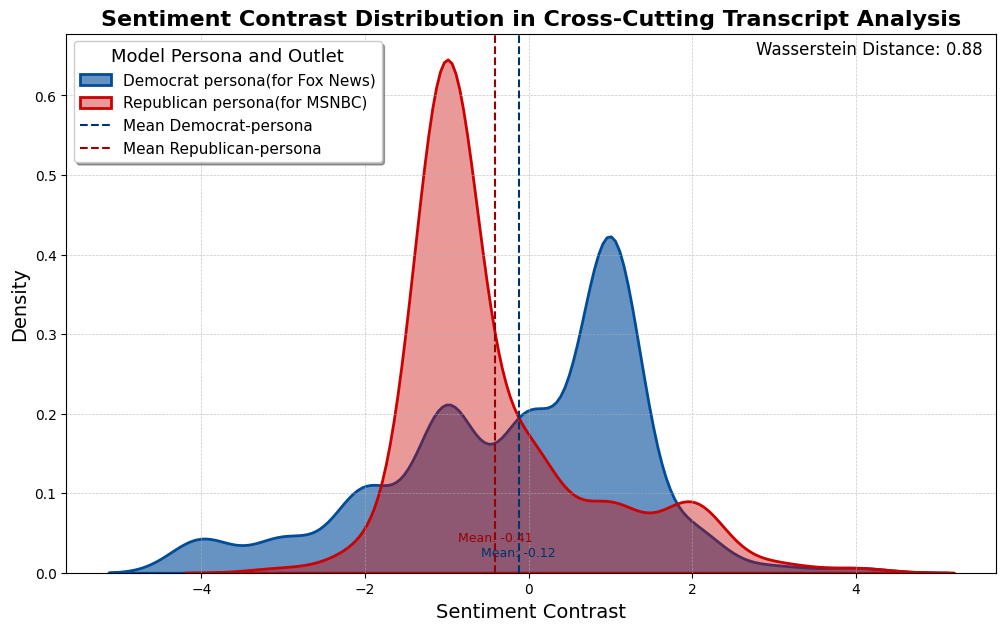

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance

# Load datasets A and B and calculate Sentiment_Contrast
df_E = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_demft.csv')
df_F = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_fox_oct27_chunks_repft.csv')
df_E1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_demft.csv')
df_F1 = pd.read_csv('/content/drive/MyDrive/CASLLM/coded_msnbc_oct27_chunks_repft.csv')

# Compute Sentiment_Contrast
df_E['Sentiment_Contrast'] = df_E['Biden_Chunk_Responses'] - df_E['Trump_Chunk_Responses']
df_F['Sentiment_Contrast'] = df_F['Biden_Chunk_Responses'] - df_F['Trump_Chunk_Responses']
df_E1['Sentiment_Contrast'] = df_E1['Biden_Chunk_Responses'] - df_E1['Trump_Chunk_Responses']
df_F1['Sentiment_Contrast'] = df_F1['Biden_Chunk_Responses'] - df_F1['Trump_Chunk_Responses']

# Calculate Wasserstein distance between cross-cutting distributions
wasserstein_dist = wasserstein_distance(df_E['Sentiment_Contrast'], df_F1['Sentiment_Contrast'])
print(f"Wasserstein Distance between Democrat and Republican persona distributions: {wasserstein_dist:.2f}")

# Plot the distributions with enhanced styling
plt.figure(figsize=(12, 7))
sns.kdeplot(df_E['Sentiment_Contrast'], fill=True, color='#004c99', label='Democrat persona(for Fox News)', alpha=0.6, linewidth=2)
sns.kdeplot(df_F1['Sentiment_Contrast'], fill=True, color='#cc0000', label='Republican persona(for MSNBC)', alpha=0.4, linewidth=2)

# Mean lines and annotations
plt.axvline(df_E['Sentiment_Contrast'].mean(), color='#003366', linestyle='--', linewidth=1.5, label='Mean Democrat-persona')
plt.axvline(df_F1['Sentiment_Contrast'].mean(), color='#990000', linestyle='--', linewidth=1.5, label='Mean Republican-persona')
plt.text(df_E['Sentiment_Contrast'].mean(), 0.02, f'Mean: {df_E["Sentiment_Contrast"].mean():.2f}', color='#003366', ha='center', fontsize=9)
plt.text(df_F1['Sentiment_Contrast'].mean(), 0.04, f'Mean: {df_F1["Sentiment_Contrast"].mean():.2f}', color='#990000', ha='center', fontsize=9)

# Title and labels with enhanced font settings
plt.title("Sentiment Contrast Distribution in Cross-Cutting Transcript Analysis", fontsize=16, weight='bold')
plt.xlabel("Sentiment Contrast", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Display Wasserstein distance on the plot
plt.figtext(0.70, 0.85, f'Wasserstein Distance: {wasserstein_dist:.2f}', fontsize=12, color='black')

# Enhanced legend
plt.legend(title="Model Persona and Outlet", title_fontsize='13', fontsize='11', loc='upper left', frameon=True, shadow=True)

# Grid and show plot
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


Wasserstein Distance between Democrat and Republican persona distributions: 3.38


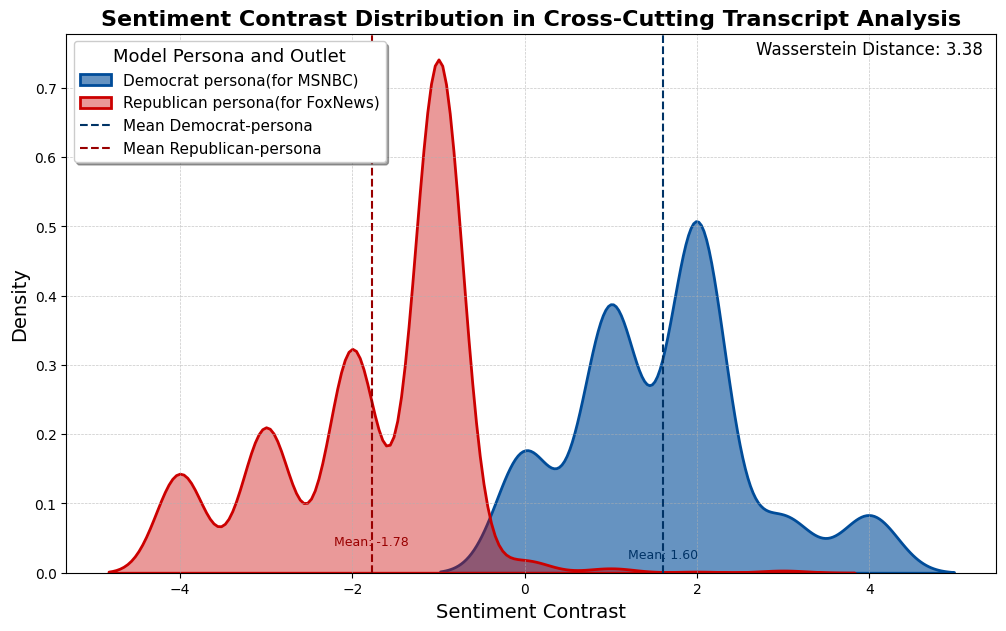

In [ ]:
# Calculate Wasserstein distance between cross-cutting distributions
wasserstein_dist = wasserstein_distance(df_E1['Sentiment_Contrast'], df_F['Sentiment_Contrast'])
print(f"Wasserstein Distance between Democrat and Republican persona distributions: {wasserstein_dist:.2f}")

# Plot the distributions with enhanced styling
plt.figure(figsize=(12, 7))
sns.kdeplot(df_E1['Sentiment_Contrast'], fill=True, color='#004c99', label='Democrat persona(for MSNBC)', alpha=0.6, linewidth=2)
sns.kdeplot(df_F['Sentiment_Contrast'], fill=True, color='#cc0000', label='Republican persona(for FoxNews)', alpha=0.4, linewidth=2)

# Mean lines and annotations
plt.axvline(df_E1['Sentiment_Contrast'].mean(), color='#003366', linestyle='--', linewidth=1.5, label='Mean Democrat-persona')
plt.axvline(df_F['Sentiment_Contrast'].mean(), color='#990000', linestyle='--', linewidth=1.5, label='Mean Republican-persona')
plt.text(df_E1['Sentiment_Contrast'].mean(), 0.02, f'Mean: {df_E1["Sentiment_Contrast"].mean():.2f}', color='#003366', ha='center', fontsize=9)
plt.text(df_F['Sentiment_Contrast'].mean(), 0.04, f'Mean: {df_F["Sentiment_Contrast"].mean():.2f}', color='#990000', ha='center', fontsize=9)

# Title and labels with enhanced font settings
plt.title("Sentiment Contrast Distribution in like-minded Transcript Analysis", fontsize=16, weight='bold')
plt.xlabel("Sentiment Contrast", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Display Wasserstein distance on the plot
plt.figtext(0.70, 0.85, f'Wasserstein Distance: {wasserstein_dist:.2f}', fontsize=12, color='black')

# Enhanced legend
plt.legend(title="Model Persona and Outlet", title_fontsize='13', fontsize='11', loc='upper left', frameon=True, shadow=True)

# Grid and show plot
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()